In [1]:
from benchmark_new import *
%matplotlib inline

385
385
385
385
385
385
385
385
385
385
385
385
385
385
385
385
385
385


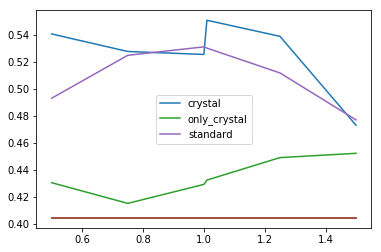

In [36]:
helpers = 'pdb'
mcss = '../../../mcss_sizes.pkl'

data = pd.concat(load(version, helpers, mcss) for version in ['stats21'])
data = add_correct(data, thresh = 2.0)
#data = filter_to_ubiquitous_ligands(data)
data = data[  (data.index.get_level_values('protein') != 'A2AR')
            & (data.index.get_level_values('protein') != 'VDR')
            & (data.index.get_level_values('protein') != 'TRPV1')
            & (data.index.get_level_values('protein') != 'MAPK14')]
data = data[data.mcss < 0.5]
#data = data[data.best_correct]

def results(alpha, method):
    ligand = data.xs((helpers, method, 0, 'mcss_contact_hbond_sb', alpha),
                      level=('helpers', 'mode', 'n_ligs', 'features', 'alpha')).filter(regex='rmsd|correct')
    target = ligand.groupby(level=list(range(len(ligand.index.levels)-1))).mean().dropna()
    print(ligand.shape[0])
    family_ligand = ligand.groupby(level=list(range(len(ligand.index.levels)-2))).mean()
    family_target = target.groupby(level=list(range(len(target.index.levels)-1))).mean()
    perf = drug_average(family_ligand)
    return perf['glide_correct'][0], perf['combind_correct'][0]

alphas = [0.5, 0.75, 1.0, 1.01, 1.25, 1.5]
#alphas = [0.06, 0.12, 0.24]
for method in ['crystal', 'only_crystal', 'standard']:
    combind, glide = [], []
    for alpha in alphas:
        g, c = results(alpha, method)
        combind += [c]
        glide += [g]
    
    plt.plot(alphas, combind, label = method)
    plt.plot(alphas, glide)
plt.legend()
plt.show()

272
272
272
272
272
272


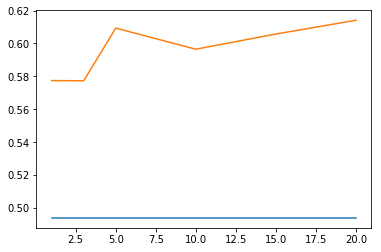

In [13]:
helpers = 'best_affinity_diverse'
mcss = '../../../mcss_sizes.pkl'

data = pd.concat(load(version, helpers, mcss) for version in ['stats21'])
data = add_correct(data, thresh = 2.0)
data = filter_to_ubiquitous_ligands(data)
data = data[  (data.index.get_level_values('protein') != 'A2AR')
            & (data.index.get_level_values('protein') != 'VDR')
            & (data.index.get_level_values('protein') != 'TRPV1')
            & (data.index.get_level_values('protein') != 'MAPK14')]
data = data[data.mcss < 0.5]
data = data[data.best_correct]

def results(ligs):
    ligand = data.xs((helpers, 'standard', ligs, 'mcss_contact_hbond_sb', 1.0),
                      level=('helpers', 'mode', 'n_ligs', 'features', 'alpha')).filter(regex='rmsd|correct')
    target = ligand.groupby(level=list(range(len(ligand.index.levels)-1))).mean().dropna()
    print(ligand.shape[0])
    family_ligand = ligand.groupby(level=list(range(len(ligand.index.levels)-2))).mean()
    family_target = target.groupby(level=list(range(len(target.index.levels)-1))).mean()
    perf = drug_average(family_target)
    return perf['glide_correct'][0], perf['combind_correct'][0]

#alphas = [0.5, 0.75, 1.0, 1.25, 1.5]
alphas = [1, 3, 5, 10, 15, 20]
combind, glide = [], []
for alpha in alphas:
    c, g = results(alpha)
    combind += [c]
    glide += [g]
    
plt.plot(alphas, combind)
plt.plot(alphas, glide)
plt.show()

422
422
422
422
422
422
422
422
422
422
422
422
422
422
422
422
422
420
422
422
422
422
422
422
422
416
422
422
422
419


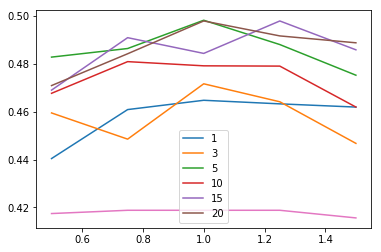

422
422
422
422
422
416
422
422
422
422
422
422
422
422
422
420
422
422
422
422
422
422
422
422
422
422
422
422
422
419


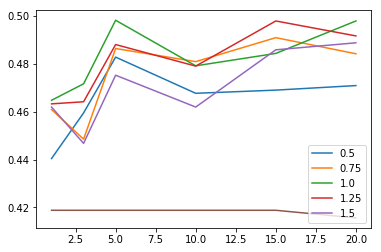

In [9]:
helpers = 'best_affinity_diverse'
mcss = '../../../mcss_sizes.pkl'

data = pd.concat(load(version, helpers, mcss) for version in ['stats21'])
data = add_correct(data, thresh = 2.0)
#data = filter_to_ubiquitous_ligands(data)
# data = data[  (data.index.get_level_values('protein') != 'A2AR')
#             & (data.index.get_level_values('protein') != 'VDR')
#             & (data.index.get_level_values('protein') != 'TRPV1')
#             & (data.index.get_level_values('protein') != 'MAPK14')]
data = data[data.mcss < 0.5]

def results(alpha, lig):
    ligand = data.xs((helpers, 'standard', lig, 'mcss_contact_hbond_sb', alpha),
                      level=('helpers', 'mode', 'n_ligs', 'features', 'alpha')).filter(regex='rmsd|correct')
    target = ligand.groupby(level=list(range(len(ligand.index.levels)-1))).mean().dropna()
    print(ligand.shape[0])
    family_ligand = ligand.groupby(level=list(range(len(ligand.index.levels)-2))).mean()
    family_target = target.groupby(level=list(range(len(target.index.levels)-1))).mean()
    perf = drug_average(family_target)
    return perf['glide_correct'][0], perf['combind_correct'][0]

alphas = [0.5, 0.75, 1.0, 1.25, 1.5]
ligs = [1, 3, 5, 10, 15, 20]

for lig in ligs:
    combind, glide = [], []
    for alpha in alphas:
        g, c = results(alpha, lig)
        combind += [c]
        glide += [g]

    plt.plot(alphas, combind, label = lig)
plt.plot(alphas, glide)
plt.legend()
plt.show()



for alpha in alphas:
    combind, glide = [], []
    for lig in ligs:
        g, c = results(alpha, lig)
        combind += [c]
        glide += [g]

    plt.plot(ligs, combind, label = alpha)
plt.plot(ligs, glide)
plt.legend()
plt.show()